In [4]:
from sqlalchemy import create_engine
import pandas as pd 
from faker import Faker
import random


In [5]:

# Initialize Faker
fake = Faker()

# Create a list to hold the generated data
data = []
for _ in range(1000):  # Generate 1000 transactions
    transaction = {
        'transaction_id': fake.uuid4(),
        'product_id': random.randint(1, 50),
        'quantity': random.randint(1, 10),
        'price': round(random.uniform(5, 100), 2),
        'transaction_date': fake.date_between(start_date='-1y', end_date='today')
    }
    data.append(transaction)

# Convert the list to a DataFrame
df = pd.DataFrame(data)

# Create a SQLite engine and save the DataFrame as a table
engine = create_engine('sqlite:///sales_data.db')
df.to_sql('transactions', con=engine, if_exists='replace', index=False)

print("Sample sales data created successfully!")

Sample sales data created successfully!


In [7]:
# Example connection to an SQLite sales database
engine = create_engine('sqlite:///sales_data.db')
connection = engine.connect()

In [8]:
# SQL query to extract transaction data
query = """
SELECT transaction_id, product_id, quantity, price, transaction_date
FROM transactions
WHERE transaction_date BETWEEN '2023-01-01' AND '2023-12-31'
"""

# Load the data into a Pandas DataFrame
df_transactions = pd.read_sql(query, con=connection)

In [9]:
# Calculate total sales for each product
df_transactions['total_sales'] = df_transactions['quantity'] * df_transactions['price']
sales_summary = df_transactions.groupby('product_id')['total_sales'].sum().reset_index()

# Sort products by total sales
top_products = sales_summary.sort_values(by='total_sales', ascending=False).head(10)

print(top_products)

    product_id  total_sales
21          22      5020.56
49          50      3894.89
43          44      3780.13
40          41      3654.08
35          36      3357.53
0            1      3289.33
5            6      3132.00
11          12      3044.55
24          25      3038.65
47          48      3037.29


In [11]:
query = "SELECT * FROM transactions"
df_show = pd.read_sql(query , con=connection)
print(df.head())

                         transaction_id  product_id  quantity  price  \
0  22898e4d-445c-4aac-af87-5e9f8e64587b          49         3  42.63   
1  630cec12-df0c-4c53-9fc7-dc61970e6a2d          28         4  19.76   
2  3cbc69c1-c613-4a87-b152-5393d6a18cb6          11         5  83.24   
3  480b10a8-6e43-4b04-825f-63de0f29e4a9           3         7  56.22   
4  2bfdc9f3-3686-4ca9-aa6f-7bd301cb01bd          22         3  10.06   

  transaction_date  
0       2024-02-16  
1       2024-02-18  
2       2024-04-14  
3       2024-06-03  
4       2024-06-24  


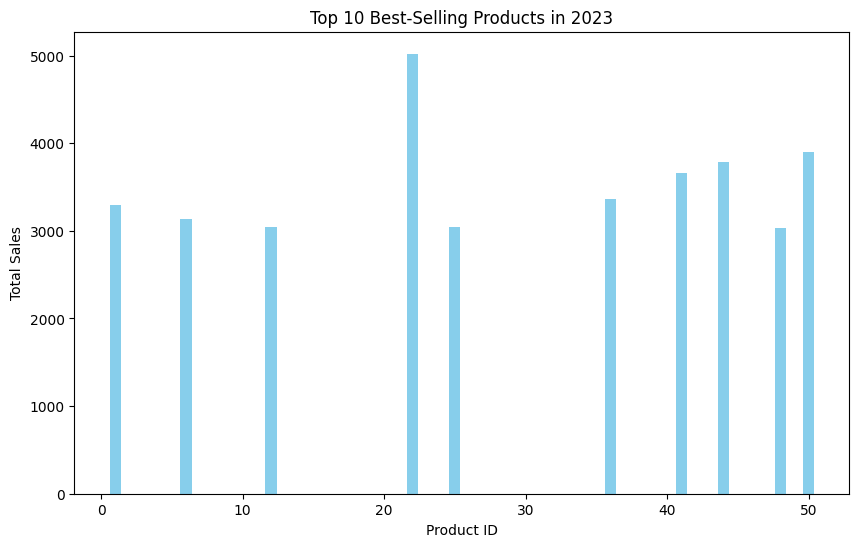

In [12]:
import matplotlib.pyplot as plt

# Plot the top 10 products by sales
plt.figure(figsize=(10, 6))
plt.bar(top_products['product_id'], top_products['total_sales'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.title('Top 10 Best-Selling Products in 2023')
plt.show()